<a href="https://colab.research.google.com/github/bzimons/mvp_puc_1/blob/mvp_development/mvp1_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Análise de Dados e Boas Práticas
## Aluna: Beatriz Leal Simões e Silva

## 1. Definição do Problema

O dataset escolhido para a realização deste trabalho é sobre dados de séries de TV disponíveis em diversos serviços de *Streaming*. Este dataset permite observar a disponibilidade das séries em cada plataforma, são elas: **Netflix, Prime Video, Hulu e Disney + **. Também a avaliação de notas por usuários que assistiram de dois sites famosos para este tipo de conteúdo, o site **Rotten Tomatoes** e **IMDb**.

 A pontuação do site *Rotten Tomatoes* se chama **Tomatometer**, essa pontuação é baseada na porcentagem de críticas positivas que um filme ou programa de TV recebe de críticos profissionais, enquanto a  pontuação **IMDb** calcula suas pontuações com base na média das avaliações dos usuários.


A Netflix é um serviço de assinatura de streaming que oferece uma variedade de conteúdos, incluindo os originais exclusivos da Netflix. O Hulu é um serviço de streaming que combina uma biblioteca de conteúdo sob demanda com programação de TV ao vivo. O Prime Video é o serviço de streaming que também possui produções originais da Amazon. O Disney+ é um serviço de streaming que se concentra principalmente em conteúdo da Disney,incluindo séries originais da Disney.


Os dados foram obtidos na plataforma Kaggle, o link de acesso da base e as demais fontes do trabalho estarão disponíveis ao final do MVP.

O dataset é  composto dos seguintes atributos:

1.  **Row**: Index da linha
2.  **ID**: ID único da série de TV
3.  **Title**: Título da série
4.  **Year**: Ano de lançamento da série
5.  **Age**: Faixa etária recomendada
6.  **IMDb**: Nota do site IMDB
7.  **Rotten Tomatoes**: Nota do site Rotten Tomatoes
8.  **Netflix**: Se a série existe no Netflix (1 se sim, 0 se não)
9.  **Hulu**:  Se a série existe no Hulu (1 se sim, 0 se não)
10.  **Prime Video**:  Se a série existe no Prime Video (1 se sim, 0 se não)
11. **Type**: Se é filme ou série de TV


In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point, xlim, ylim, geom_jitter, geom_abline, theme_set, theme_bw, geom_histogram, geom_bar, ylab

## 2. Leitura dos dados



In [2]:
# Leitura e visualização do cabeçalho
path_tv = "https://raw.githubusercontent.com/bzimons/mvp_puc_1/main/tv_shows.csv"
df_tv = pd.read_csv(path_tv)
df_tv.head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1
5,5,6,Avatar: The Last Airbender,2005,7+,9.3/10,93/100,1,0,1,0,1
6,6,7,Peaky Blinders,2013,18+,8.8/10,93/100,1,0,0,0,1
7,7,8,The Walking Dead,2010,18+,8.2/10,93/100,1,0,0,0,1
8,8,9,Black Mirror,2011,18+,8.8/10,92/100,1,0,0,0,1
9,9,10,The Queen's Gambit,2020,18+,8.6/10,92/100,1,0,0,0,1


In [3]:
# quantidade de linhas e colunas do DF
print(df_tv.shape)

(5368, 12)


In [4]:
# Quantas colunas do dataset possuem valores vazios (null)
print(df_tv.isnull().any())

Row                False
ID                 False
Title              False
Year               False
Age                 True
IMDb                True
Rotten Tomatoes    False
Netflix            False
Hulu               False
Prime Video        False
Disney+            False
Type               False
dtype: bool


In [5]:
# Valores únicos do atributo 'IMDb'
unique_IMDb = df_tv['IMDb'].unique()
print(unique_IMDb)

['9.4/10' '8.7/10' '9.0/10' '8.8/10' '9.3/10' '8.2/10' '8.6/10' '8.5/10'
 '8.3/10' '8.1/10' '8.4/10' '8.0/10' '7.6/10' '9.1/10' '7.5/10' '7.7/10'
 '8.9/10' '7.9/10' '7.8/10' '7.2/10' '6.8/10' '7.3/10' '7.4/10' '6.2/10'
 '6.5/10' '6.7/10' '7.1/10' '5.4/10' '6.1/10' '4.9/10' '6.4/10' '6.9/10'
 '6.6/10' '7.0/10' '5.9/10' '5.8/10' '6.3/10' '4.6/10' '5.5/10' '6.0/10'
 '5.7/10' '5.0/10' '3.4/10' '4.7/10' '5.3/10' '4.3/10' '5.6/10' '3.8/10'
 '5.1/10' '3.9/10' '4.5/10' nan '5.2/10' '4.8/10' '3.5/10' '4.2/10'
 '3.6/10' '4.4/10' '3.7/10' '1.1/10' '3.3/10' '4.1/10' '4.0/10' '2.5/10'
 '2.7/10' '3.2/10' '2.3/10' '9.2/10' '2.8/10' '3.1/10' '1.8/10' '3.0/10'
 '2.6/10' '1.9/10' '1.5/10' '2.9/10' '2.4/10' '9.5/10' '9.6/10']


In [6]:
# Valores únicos do atributo 'Rotten Tomatoes'
unique_tomatoes = df_tv['Rotten Tomatoes'].unique()
print(unique_tomatoes)

['100/100' '96/100' '95/100' '94/100' '93/100' '92/100' '90/100' '89/100'
 '88/100' '87/100' '86/100' '85/100' '84/100' '83/100' '82/100' '81/100'
 '80/100' '79/100' '78/100' '77/100' '76/100' '75/100' '74/100' '73/100'
 '72/100' '71/100' '70/100' '69/100' '68/100' '67/100' '66/100' '65/100'
 '64/100' '63/100' '62/100' '61/100' '60/100' '59/100' '58/100' '57/100'
 '56/100' '55/100' '54/100' '53/100' '52/100' '51/100' '50/100' '49/100'
 '48/100' '47/100' '46/100' '45/100' '44/100' '43/100' '42/100' '41/100'
 '40/100' '39/100' '38/100' '37/100' '36/100' '35/100' '34/100' '33/100'
 '32/100' '31/100' '30/100' '29/100' '28/100' '27/100' '26/100' '25/100'
 '24/100' '23/100' '22/100' '21/100' '20/100' '19/100' '18/100' '17/100'
 '16/100' '14/100' '13/100' '10/100' '91/100']


In [7]:
# Valores únicos do atributo 'Age'
unique_age = df_tv['Age'].unique()
print(unique_age)

['18+' '16+' '7+' 'all' nan '13+']


In [8]:
# verificando os nulos na variável 'Age'
locate_age_null = df_tv['Age'].isnull().sum()
print("quantidade de nulos na variável 'Age': ",locate_age_null)

quantidade de nulos na variável 'Age':  2127


À primeira vista, podemos notar a necessidade de realizar certos tratamentos aos dados, como a presença de dados faltantes nas colunas "Age" e "IMDb.

As colunas **Rotten Tomatoes (RT)** e **IMDb** possuem a nota de avaliação da série sendo um valor de 0 à 10 ou de 0 à 100. Além disso, contém valores "nan", que são valorez vazios ou *null*.

Estas colunas podem ser facilmente transformadas em valores numéricos. Em ambas colunas a melhor estratégia será remover os últimos dígitos, pois é o padrão identificável ao observar os valores únicos para depois converte-las para *float*. A variável RT será dividida por 10, desta forma ambas colunas de notas estarão normalizadas na mesma escala.

Para a coluna "Age", são 2127 séries que possuem esta coluna vazia. Como seria difícil estimar estes valores com base nos dados em questão, estarei optando por remover também essas linhas vazias.

## 3.  Pré-Processamento

In [9]:
#tratamento das colunas
df_tv_fix = df_tv.copy()
df_tv_fix = df_tv_fix.dropna(subset=['Age'], axis=0)
df_tv_fix = df_tv_fix.dropna(subset=['IMDb'], axis=0)
df_tv_fix['IMDb'] = df_tv_fix['IMDb'].str.replace('/10$','',regex=True).astype(float)
df_tv_fix['Rotten Tomatoes'] = df_tv_fix['Rotten Tomatoes'].str.replace('/100$','',regex=True).astype(float)
df_tv_fix['Rotten Tomatoes'] = df_tv_fix['Rotten Tomatoes']/10
df_tv_fix.head(5)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4,10.0,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7,9.6,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0,9.5,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8,9.4,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8,9.3,1,0,0,0,1


In [10]:
#tamanho do novo dataset
print(df_tv_fix.shape)

(3207, 12)


Como a coluna de avaliações das séries que possuem valores vazios (null) é apenas a coluna "IMDb", A melhor estratégia de obter a nota "IMDb" seria utilizar a nota equivalente do "Rotten Tomatoes". Porém, considerando que um dos objetivos da análise é uma comparação entre a variação das duas notas, igualar esta nota não traria benefícios para a análise comparativa. Portanto, as séries que não possuem nota na coluna "IMDb" seráo removidas do *dataset*.

 Assim, após a limpeza do *dataset*, o dataframe final possui 3207 observações para serem analisadas.


In [11]:
# verificando se sobrou algum valor nulo
print(df_tv_fix.isnull().any())

Row                False
ID                 False
Title              False
Year               False
Age                False
IMDb               False
Rotten Tomatoes    False
Netflix            False
Hulu               False
Prime Video        False
Disney+            False
Type               False
dtype: bool


In [12]:
# Valores únicos do atributo 'IMDb'
unique_IMDb = df_tv_fix['IMDb'].unique()
print(np.sort(unique_IMDb))

[1.1 1.5 1.8 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6 3.7
 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5
 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3
 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.  9.1
 9.2 9.3 9.4 9.5 9.6]


In [13]:
# Valores únicos do atributo 'Rotten Tomatoes'
unique_tomatoes = df_tv_fix['Rotten Tomatoes'].unique()
print(np.sort(unique_tomatoes))

[ 2.4  2.5  2.6  2.7  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7
  3.8  3.9  4.   4.1  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1
  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5
  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9
  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3
  9.4  9.5  9.6 10. ]


In [14]:
# Valores únicos do atributo 'Age'
unique_age = df_tv_fix['Age'].unique()
print(np.sort(unique_age))

['13+' '16+' '18+' '7+' 'all']


In [15]:
df_tv_fix.describe()

,Row,ID,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
count,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.000000,3207.0
mean,2231.943873,2327.786093,2011.941378,7.133645,5.767664,0.414406,0.377923,0.233863,0.080137,1.0
std,1445.808455,1549.519594,10.312960,1.089901,1.381135,0.492696,0.484944,0.423352,0.271548,0.0
min,0.000000,1.000000,1934.000000,1.100000,2.400000,0.000000,0.000000,0.000000,0.000000,1.0
25%,932.500000,935.500000,2010.000000,6.600000,4.700000,0.000000,0.000000,0.000000,0.000000,1.0
50%,2240.000000,2294.000000,2015.000000,7.300000,5.600000,0.000000,0.000000,0.000000,0.000000,1.0
75%,3243.000000,3375.000000,2018.000000,7.900000,6.700000,1.000000,1.000000,0.000000,0.000000,1.0
max,5342.000000,5691.000000,2021.000000,9.600000,10.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [16]:
# Tipos de cada atributo do DF
df_tv_fix.dtypes

Row                  int64
ID                   int64
Title               object
Year                 int64
Age                 object
IMDb               float64
Rotten Tomatoes    float64
Netflix              int64
Hulu                 int64
Prime Video          int64
Disney+              int64
Type                 int64
dtype: object

## 4. Análise dos dados


Agora com as notas ajustadas e remoção das variáveis vazias, podemos fazer as primeiras visualizações:

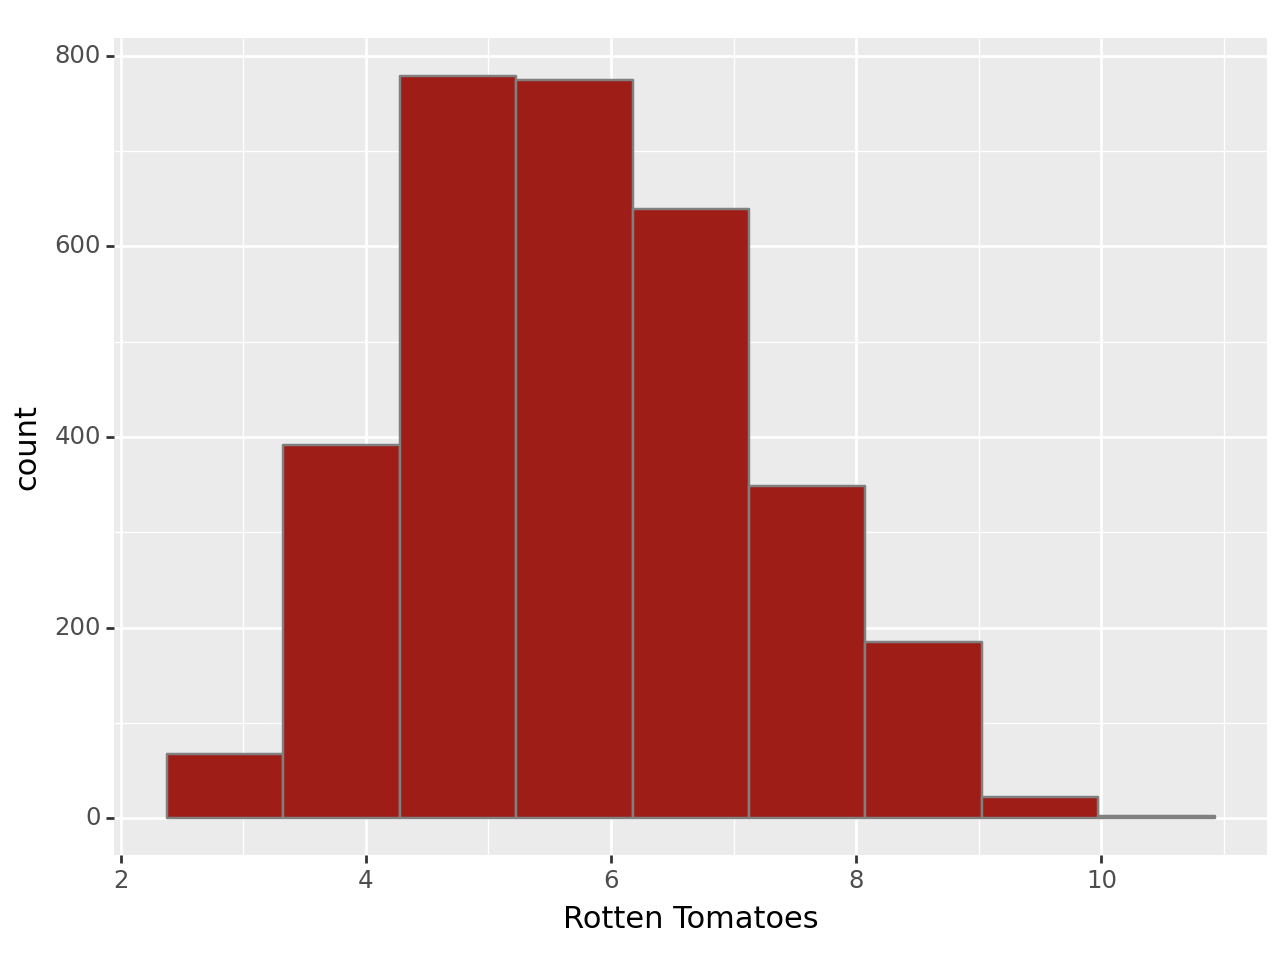

<Figure Size: (640 x 480)>

In [17]:
(
 ggplot(df_tv_fix, aes(x='Rotten Tomatoes')) +
  geom_histogram(fill='#9e1d16',colour='grey',bins = 9) +
  theme_set(theme_bw())
)


Este histograma representa a distribuição das notas da plata forma *Rotten Tomatoes*. Pode-se observar que os dados aparentam quase seguir uma distribuição normal, onde a média (5,76) e mediana (5,6) estarão pelo centro do histograma.

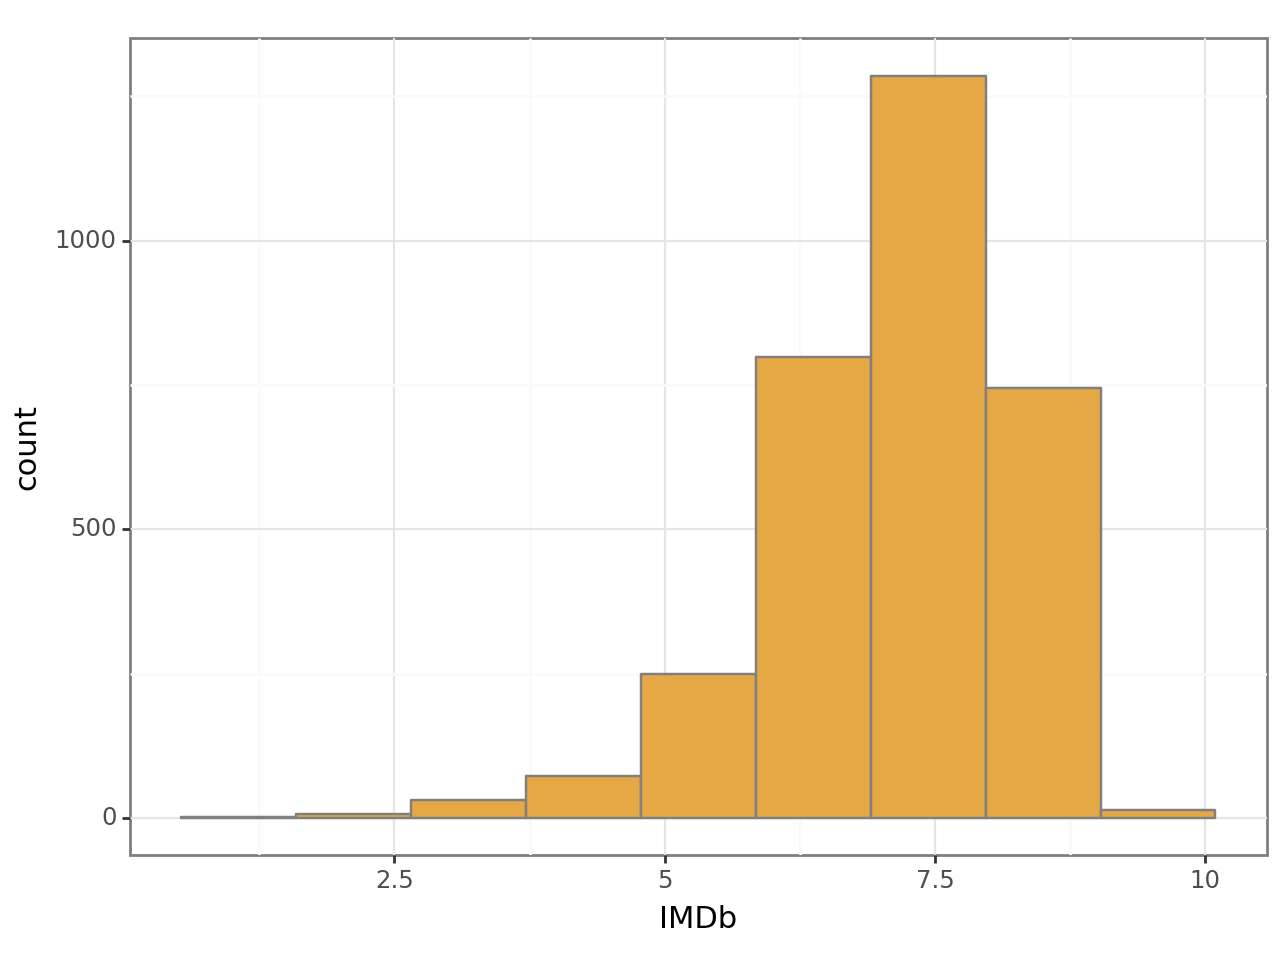

<Figure Size: (640 x 480)>

In [18]:
(
 ggplot(df_tv_fix, aes(x='IMDb')) +
  geom_histogram(fill='#e6a845',colour='grey',bins = 9) +
  theme_set(theme_bw())
)

Este histograma representa a distribuição das notas da plataforma *IMDb*. Diferente do anterior, os dados aqui estão detalhados por uma assimetria direita, numa distribuição em que a média (7,13) estará abaixo da mediana (7,3) e da moda.

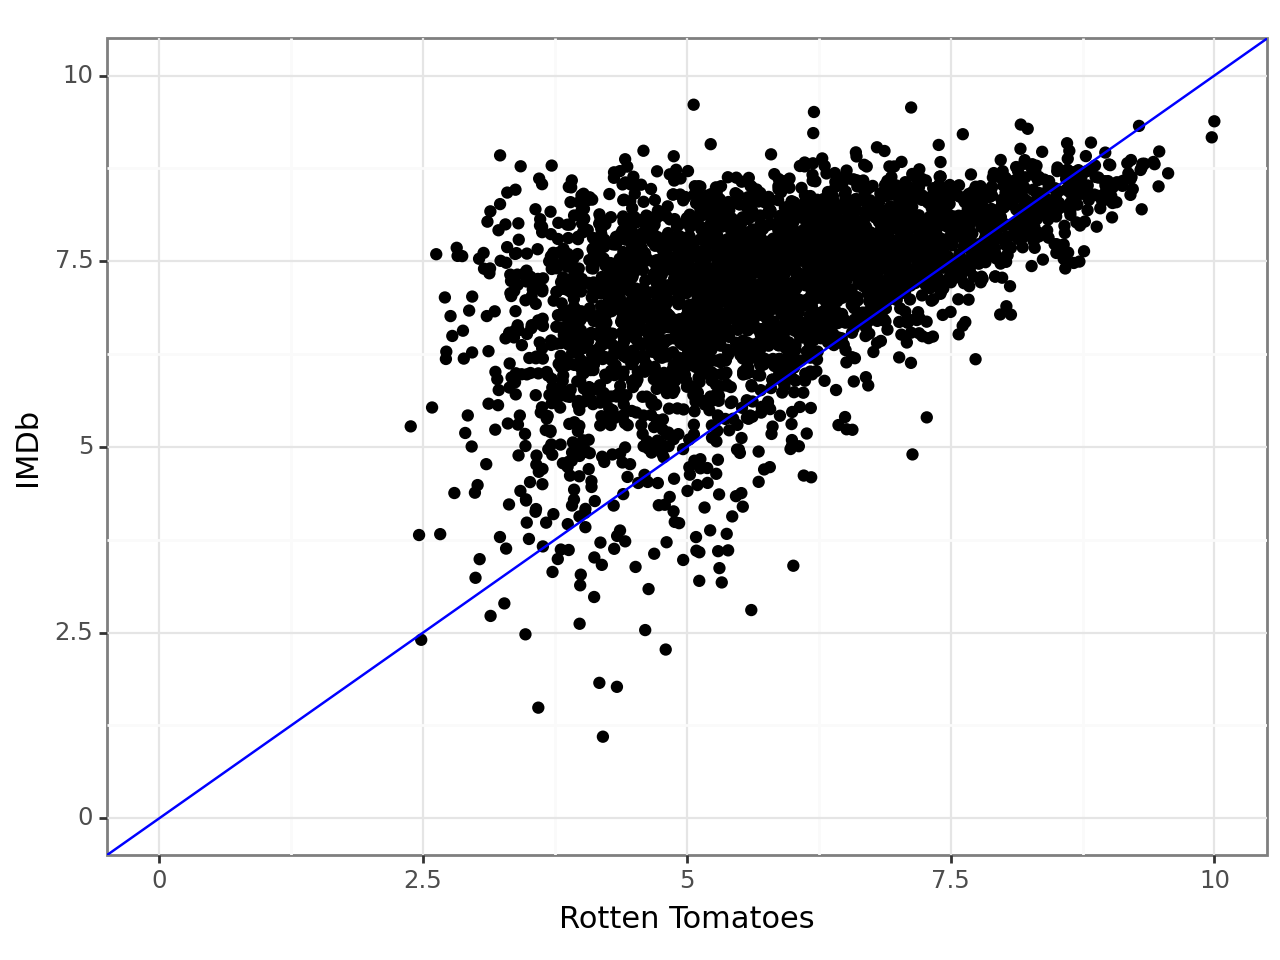

<Figure Size: (640 x 480)>

In [19]:
(
    ggplot(df_tv_fix)
    + aes(x="Rotten Tomatoes", y="IMDb")
    + geom_jitter()
    + geom_abline(intercept=0,slope=1,colour="blue")
    + xlim(0,10)
    + ylim(0,10)
    + theme_set(theme_bw())
)

Neste gráfico de dispersão, observamos a distribuição das notas das duas plataformas, *Rotten Tomatoes (RT)* e *IMDb*. Podemos ver claramente que existe uma super-estimação das notas do IMDb em relação ao RT. Talvez uma suposição, considerando os gráficos e o conhecimento superficial sobre como são feitas estas avaliações, as notas de críticos de cinema (RT) podem tender a ser mais rigorosas que as notas dos usuários padrões (IMDb), ou seja, pessoas comuns que assistem as séries e filmes não tendem a ter o olhar rigoroso e nem o estudo da arte do cinema que um crítico profissional é treinado para ter.

Não necessariamente um filme bem avaliado pelos usuários no IMDb será bem avaliado pelas críticas no *Rotten Tomatoes*.

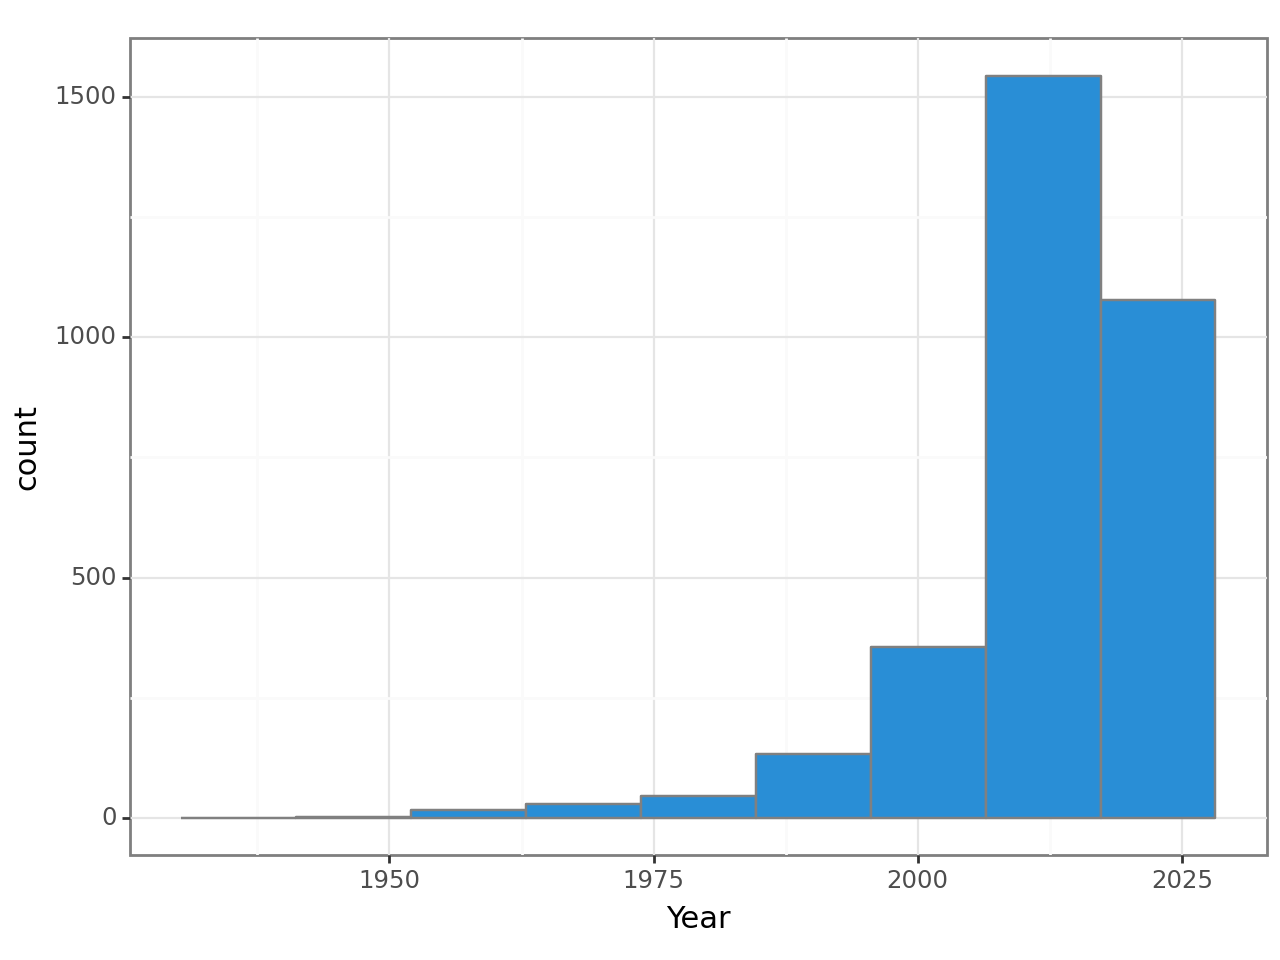

<Figure Size: (640 x 480)>

In [20]:
(
 ggplot(df_tv_fix, aes(x='Year')) +
  geom_histogram(fill='#298ed6',colour='grey',bins = 9) +
  theme_set(theme_bw())
)



Neste histograma, vemos a relação dos Anos em que as séries foram produzidas. Vemos uma clara "explosão" de conteúdo a partir dos anos 2000. Fácil de perceber também que com o avanço da tecnologia e dos meios de comunicação como Televisão e plataformas de *streaming*, se tornou mais viável e mais rentável investir na indústria cinematográfica nos anos mais recentes.



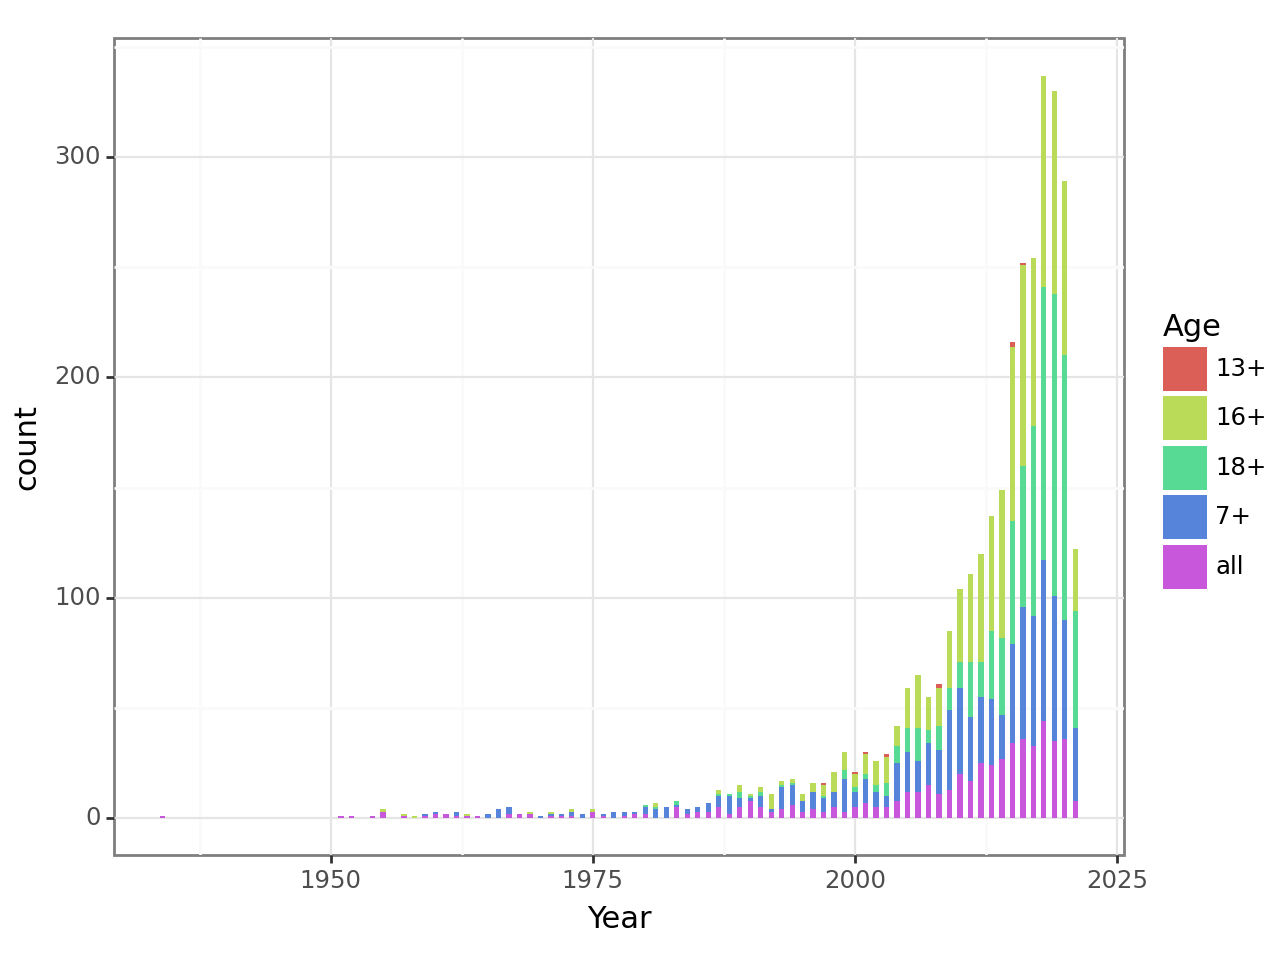

<Figure Size: (640 x 480)>

In [21]:
(
    ggplot(df_tv_fix,aes("Year")) +
   geom_bar(aes(fill="Age"), width = 0.5) +
   theme_set(theme_bw())
)

Aqui é fácil ver que ao longo dos anos houve uma crescente de quantidade séries, com exceção de após ano de 2020, provavelmente devido a pandemia do Coronavírus, muitos lançamentos foram adiados e algumas produção não foram totalmente retomadas.

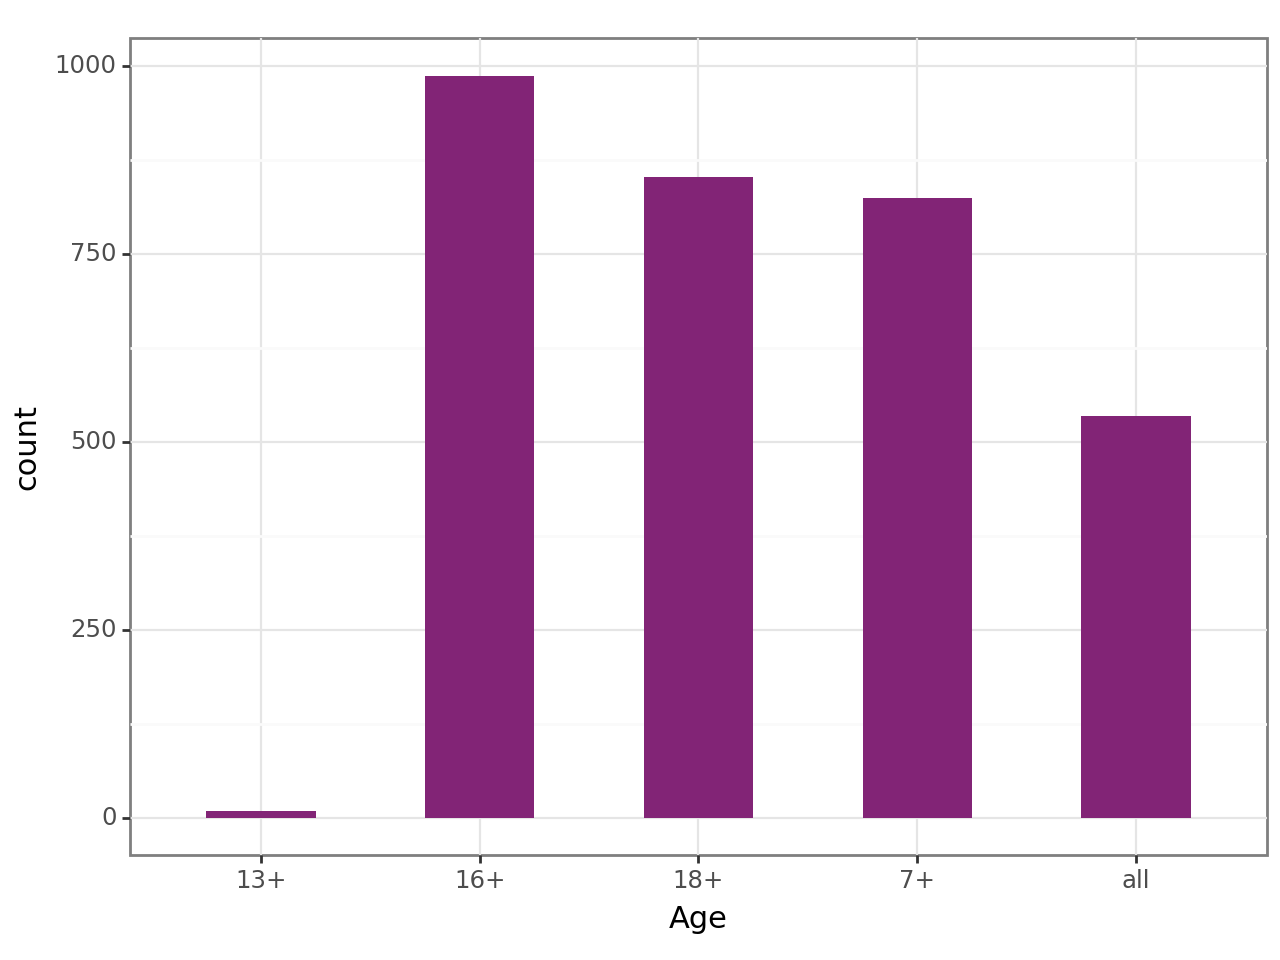

<Figure Size: (640 x 480)>

In [22]:
(
    ggplot(df_tv_fix,aes("Age")) +
   geom_bar(aes(), fill="#822476", width = 0.5) +
   theme_set(theme_bw())
)

In [23]:
print(df_tv_fix.groupby(by="Age")["Age"].count())

Age
13+      9
16+    987
18+    852
7+     824
all    535
Name: Age, dtype: int64


Nesses dois gráficos de barras, mais a análise do agrupamento, vemos como as séries pra pessoas com pelo menos de 16 anos parecem ser o foco de produção da indústria, porém as séries para mais de 7 anos e de classificação livre não ficam atrás. No geral, é possível encontrar uma grande variedade de séries para todas as idades.

### 4.1 Esta relação abre portas para uma análise de curiosidade: qual devem ser as séries com maior e menor diferença entre notas?

In [24]:
#calculando o valor absoluto da diferença entre as notas
df_tv_fix['diferenca_nota'] = (df_tv_fix['Rotten Tomatoes'] - df_tv_fix['IMDb']).apply(np.abs)

In [25]:
#notas mais altas e diferença de nota zero
df_dif_nota_0 = df_tv_fix.loc[df_tv_fix['diferenca_nota']==0]
df_dif_nota_0.sort_values(by=['IMDb'],ascending=False).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota
5,5,6,Avatar: The Last Airbender,2005,7+,9.3,9.3,1,0,1,0,1,0.0
1959,1959,1971,Firefly,2002,16+,9.0,9.0,0,1,0,0,1,0.0
30,30,31,Arrested Development,2003,16+,8.7,8.7,1,1,0,0,1,0.0
1973,1973,1987,Freaks and Geeks,1999,16+,8.7,8.7,0,1,0,0,1,0.0
1972,1972,1986,This Is Us,2016,16+,8.7,8.7,0,1,1,0,1,0.0
1970,1970,1984,Line of Duty,2012,18+,8.7,8.7,0,1,1,0,1,0.0
1977,1977,1993,Archer,2009,18+,8.6,8.6,0,1,0,0,1,0.0
1979,1979,1997,Adventure Time,2010,7+,8.6,8.6,0,1,0,0,1,0.0
40,40,41,Star Trek: The Next Generation,1987,7+,8.6,8.6,1,1,1,0,1,0.0
55,55,56,Marvel's The Punisher,2017,18+,8.5,8.5,1,0,0,0,1,0.0


In [26]:
#notas mais baixas e diferença de nota zero
df_dif_nota_0.sort_values(by=['IMDb'],ascending=True).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota
3992,3992,4274,Charlie's Angels,2011,16+,4.4,4.4,1,0,1,0,1,0.0
1365,1365,1369,All About the Washingtons,2018,all,4.5,4.5,1,0,0,0,1,0.0
1319,1319,1322,The Big Day,2021,18+,4.6,4.6,1,0,0,0,1,0.0
1103,1103,1106,Rabbids Invasion,2013,7+,5.0,5.0,1,1,0,0,1,0.0
2702,2702,2807,Top Gear,2010,7+,5.4,5.4,0,1,1,0,1,0.0
887,887,890,Netflix Presents: The Characters,2016,18+,5.4,5.4,1,0,0,0,1,0.0
833,833,836,PJ Masks,2015,all,5.5,5.5,1,0,0,1,1,0.0
2602,2602,2703,Fear Factor,2001,7+,5.6,5.6,0,1,0,0,1,0.0
3683,3683,3913,Say Yes to the Dress,2007,7+,5.6,5.6,0,0,1,0,1,0.0
716,716,719,Elize Matsunaga: Once Upon a Crime,2021,18+,5.8,5.8,1,0,0,0,1,0.0


In [27]:
# maior diferença entre as notas
df_tv_fix.sort_values(by=['diferenca_nota'],ascending=False).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota
4365,4365,4664,Today's Homeowner with Danny Lipford,1998,all,8.9,3.2,0,0,1,0,1,5.7
4311,4311,4609,Xploration DIY Sci,2016,all,8.8,3.4,0,0,1,0,1,5.4
4360,4360,4659,Anna's Wild Life,2011,all,8.4,3.3,0,0,1,0,1,5.1
4385,4385,4685,The Underdogs,2010,all,8.3,3.2,0,0,1,0,1,5.1
4224,4224,4520,Stacey David's GearZ,2010,all,8.8,3.7,0,0,1,0,1,5.1
4323,4323,4622,Design Squad,2007,all,8.5,3.4,0,0,1,0,1,5.1
3234,3234,3366,CNBC Titans,2010,all,8.2,3.1,0,1,0,0,1,5.1
4468,4468,4770,Talking Tom and Friends Minis,2016,all,7.6,2.6,0,0,1,0,1,5.0
5314,5314,5662,Wild Sri Lanka,2015,7+,8.6,3.6,0,0,0,1,1,5.0
4242,4242,4538,A Craftsman’s Legacy,2014,all,8.5,3.6,0,0,1,0,1,4.9


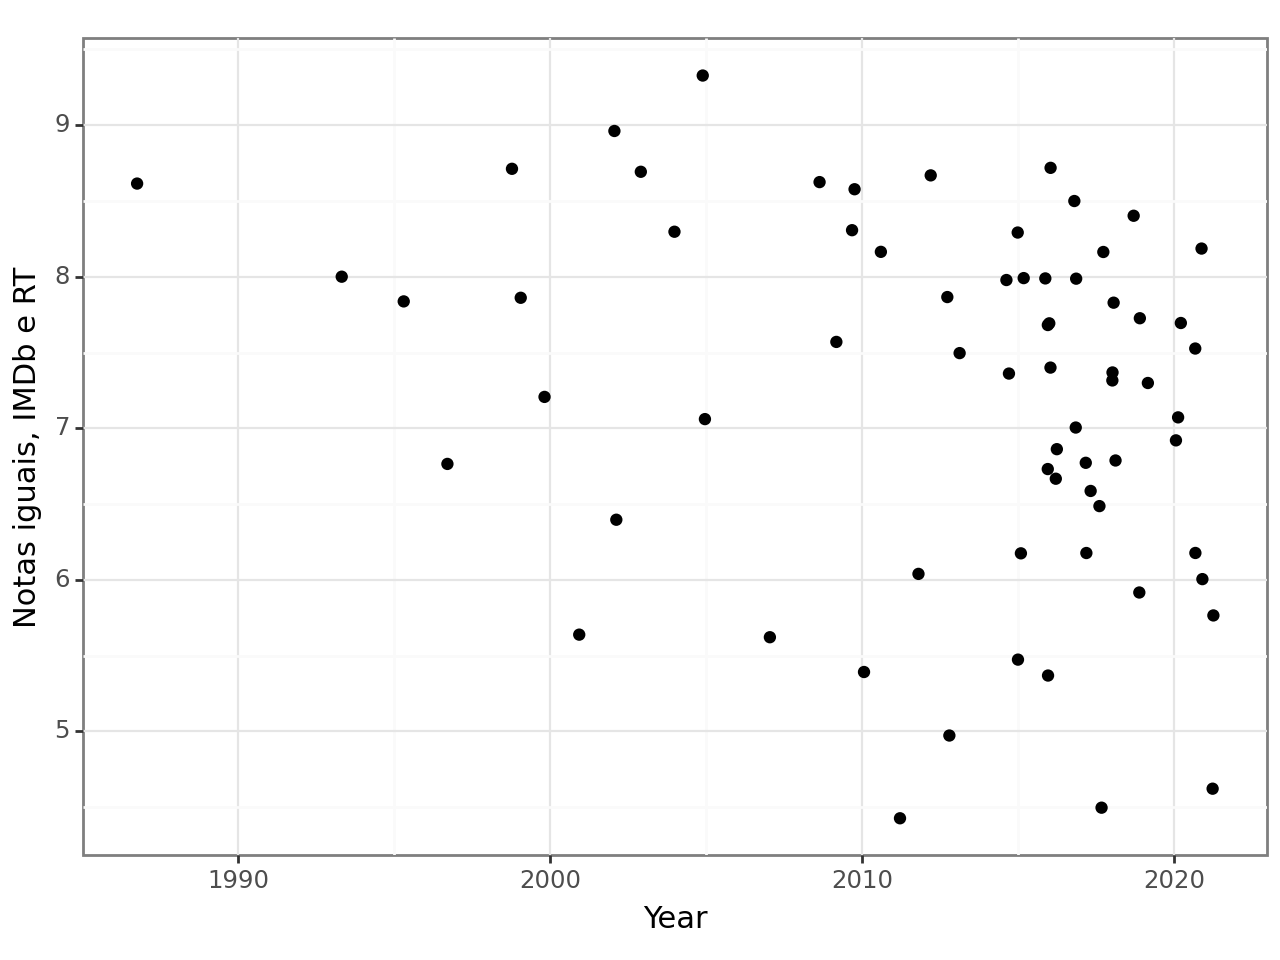

<Figure Size: (640 x 480)>

In [28]:

(
    ggplot(df_dif_nota_0)
    + aes(x="Year", y="IMDb")
    + geom_jitter()
    + theme_set(theme_bw())
    + ylab('Notas iguais, IMDb e RT')
)

Ao olhar os dois cortes do dataframe, percebemos que as séries com menor variedade das  notas e avaliações altas, são séries muito bem conhecidas na cultura popular, mas temos no gráfico de dispersão a percepção que nem todas as séries que possuem consenso entre as duas plataformas são bem avaliadas. De modo a dizer que, algumas séries são ruins em ambas. Ao observarmos o corte das séres com maiores discrepância entre as notas, elas aparentam ser séries são desconhecidas de modo geral.

Uma das limitações de utilização desta base de dados é não conseguir atribuir uma certa confiabilidade das notas. Como não sabemos o número da amostra dos críticos/usuários que avaliaram a série, não podemos descrever melhor se a nota de cada série em cada plataforma é estatisticamente significante.

### 4.2. Quais serviços de Streaming mais possui conteúdo de séries de TV? Existem séries que estão em todas as plataformas?

In [29]:
# calculando quantas vezes a mesma série está em mais de um serviço de streaming
df_tv_fix['streaming_soma'] = df_tv_fix['Netflix'] + df_tv_fix['Disney+'] + df_tv_fix['Hulu'] + df_tv_fix['Prime Video']
df_tv_fix.sort_values(by=['streaming_soma'],ascending=False).head(10)

,Row,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,diferenca_nota,streaming_soma
2115,2115,2152,Genius,2017,16+,8.3,7.4,1,1,1,1,1,0.9,4
1129,1129,1132,Supermarket Sweep,1990,all,7.5,5.0,1,1,1,0,1,2.5,3
2009,2009,2034,Cosmos,2014,all,9.3,8.2,0,1,1,1,1,1.1,3
5231,5231,5575,Pick of the Litter,2019,7+,8.1,4.7,1,1,0,1,1,3.4,3
729,729,732,Sonic X,2003,16+,6.2,5.7,1,1,1,0,1,0.5,3
1609,1609,1615,Pororo the Little Penguin,2003,all,6.0,4.0,1,1,1,0,1,2.0,3
84,84,85,Star Trek,1966,7+,8.3,8.2,1,1,1,0,1,0.1,3
670,670,673,The Game,2006,16+,6.7,5.9,1,1,1,0,1,0.8,3
644,644,647,Cold Case Files,1999,18+,8.1,6.0,1,1,1,0,1,2.1,3
599,599,602,America's Next Top Model,2003,7+,5.5,6.1,1,1,1,0,1,0.6,3


In [30]:
# quantas séries estão em apenas um serviço e em mais de um serviço:
print('Apenas em um serviço de Streaming:',df_tv_fix['streaming_soma'].loc[df_tv_fix['streaming_soma']==1].count())
print('Em mais de um serviço de Streaming:',df_tv_fix['streaming_soma'].loc[df_tv_fix['streaming_soma']>1].count())

Apenas em um serviço de Streaming: 2899
Em mais de um serviço de Streaming: 308


In [31]:
# Quantas séries estão em cada serviço de Streaming:
print('Netflix:', df_tv_fix['Netflix'].sum())
print('Hulu:', df_tv_fix['Hulu'].sum())
print('Prime Video:', df_tv_fix['Prime Video'].sum())
print('Disney+:', df_tv_fix['Disney+'].sum())

Netflix: 1329
Hulu: 1212
Prime Video: 750
Disney+: 257


Apenas a série "Genius" está em todas as plataformas, mas muitas outras estão em mais de uma. Do universo desse dados de 3207 séries de TV, 2899 estão em apenas um serviço de *streaming*.A plataforma que possui a maior quantidade de séries é a Netflix, e a que possui a menor é a Disney+.

## 5. Conclusões:

Neste MVP foi possível entender pela história que os dados contam um pouco mais sobre a dominância de séries de TV e de serviços de *Streaming*. Também foi interessante analisar que as notas dos usuários, as percepções individuais podem ser muito discrepantes do olhar de uma pessoa que estudou esta forma de arte, que é o cinema e a mídia.

Com base neste trabalho, poderia ser possível recomendar séries de TV para um usuário, com base na idade e qual plataforma de *streaming* possui. Também poderia-se elaborar perguntas sobre se o usuário se importaria com séries mais antigas ou mais novas, e também usar séries que já assistiu como base de métrica para as notas vistas, ou seja, encontrar séries com notas parecidas em ambas as plataformas para a recomendação.

Em análises futuras, se for possível obter informações como quantidade de pessoas que avaliaram aquele conteúdo para chegar na nota, gênero da série de TV, quantidade de episódios, etc. O trabalho pode ser melhorado ainda mais, elaborando um serviço de recomendação ao usuário com base em preferências pessoais de consumo de conteúdos de mídia. Além disso, poder analisar a confiabilidade daquela nota determinada tanto por críticos de cinema quanto por usuários em ambas as plataformas.

## 6. Fontes:


* https://www.kaggle.com/datasets/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney  (acessado em 19/11/2023)
*   https://www.rottentomatoes.com (acessado em 28/11/2023)
*   https://www.imdb.com  (acessado em 28/11/2023)

